---
title: MNIST Keras classifier
author: Fanni Varhelyi
format:
    html:
        embed-resources: true
        code-fold: false
        code-overflow: wrap
---

## Introduction

The goal of this notebook is to implement a multi-label classifier using a convolutional neural network and the MNIST dataset, not using any pre-trained models. The MNIST data contains hand-written digit images and is wildly used in training simpler neural networks.

The baseline for comparison is a dense feed-forward classifier built on the same data which received an accuracy of 97.8%, used as an example in [Chollet: Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition), chapter 2. My model prod accuracy of 99.01%

Main tools/skills used:
- Convolutional and dense layers in Keras
- Regularization methods
- Batch normalization

In [1]:
# Import the necessary packages
## To preprocess:
import numpy as np
from sklearn.model_selection import train_test_split
import random

## To train:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras import utils
from keras.callbacks import EarlyStopping

## To visualize:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [2]:

# Load the data split to training and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape
print(x_train.shape)

# Reshape the data
x_train = x_train.reshape((60000, 28, 28, 1))

x_test = x_test.reshape((10000, 28, 28, 1))

# Further split to training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

# Normalizing
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
y_test = utils.to_categorical(y_test, 10)

(60000, 28, 28)


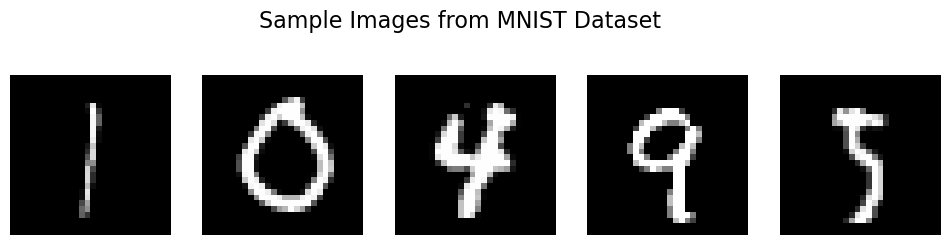

In [3]:
# Check a couple of images in the data

random_indices = random.sample(range(len(x_train)), 5)
j = 0
# Display 5 sample images from the train dataset
plt.figure(figsize=(12, 3));
for i in random_indices:
    plt.subplot(1, 5, j + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    j = j + 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

In [4]:
# Check the shapes
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)
(48000, 10)
(12000, 10)
(10000, 10)


In [8]:
# Building the model

def model():
    model = models.Sequential()                                  
    model.add(layers.Conv2D(
                32, 
                kernel_size=(5,5), 
                activation='tanh', 
                input_shape=(28, 28, 1),
                padding = 'same'))
    model.add(layers.MaxPooling2D(
                pool_size=(2, 2),
                strides=(2, 2)))
    model.add(layers.Conv2D(
            64, 
            kernel_size=(5, 5), 
            activation= 'tanh',
            padding = 'same'))
    model.add(layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2)))
    model.add(layers.Conv2D(
            128, 
            kernel_size=(5, 5), 
            activation= 'tanh',
            padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(
            128, 
            activation='relu', 
            kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.001)))
    model.add(layers.Dropout(0))
    model.add(layers.Dense(
            10, 
            activation='softmax'))
    model.compile(
        optimizer=optimizers.legacy.Adam(learning_rate=0.001), 
        loss='categorical_crossentropy', 
        metrics=['accuracy'])
    return model




In [9]:
model = model()
history = model.fit(x_train, y_train,           
                    validation_data=(x_val, y_val),
                    epochs=100, 
                    batch_size=256,
                    callbacks=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

Epoch 1/100
188/188 [==============================] - 27s 141ms/step - loss: 10.3106 - accuracy: 0.8655 - val_loss: 2.1781 - val_accuracy: 0.8253
Epoch 2/100
188/188 [==============================] - 28s 150ms/step - loss: 1.7196 - accuracy: 0.9521 - val_loss: 1.9535 - val_accuracy: 0.8695
Epoch 3/100
188/188 [==============================] - 28s 151ms/step - loss: 1.5054 - accuracy: 0.9702 - val_loss: 1.5829 - val_accuracy: 0.9463
Epoch 4/100
188/188 [==============================] - 30s 157ms/step - loss: 1.4040 - accuracy: 0.9778 - val_loss: 1.5571 - val_accuracy: 0.9243
Epoch 5/100
188/188 [==============================] - 31s 164ms/step - loss: 1.3476 - accuracy: 0.9817 - val_loss: 1.4820 - val_accuracy: 0.9265
Epoch 6/100
188/188 [==============================] - 30s 162ms/step - loss: 1.3239 - accuracy: 0.9844 - val_loss: 1.5401 - val_accuracy: 0.9295
Epoch 7/100
188/188 [==============================] - 54s 286ms/step - loss: 1.2802 - accuracy: 0.9874 - val_loss: 1.4239 

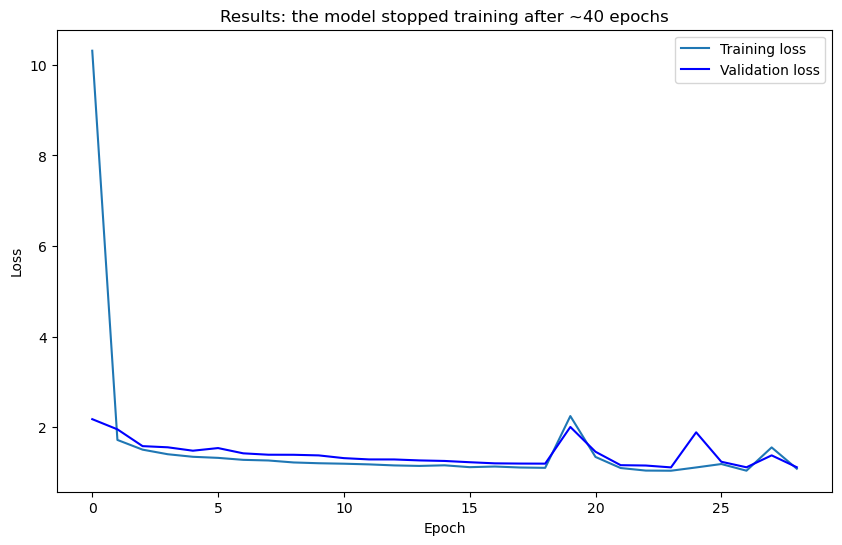

In [13]:
# Tracking training and validation error
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], 'b', label='Validation loss')
plt.title('Results: the model stopped training after ~40 epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../output/mnist_training_validation_loss.png')
plt.show()

In [15]:
# Fit the test data to see the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)


print(f"Final results\n Test loss: {test_loss:.2f}\n Test accuracy: {test_acc:.2%}")

313/313 [==============================] - 2s 6ms/step - loss: 1.0464 - accuracy: 0.9901
Final results
 Test loss: 1.05
 Test accuracy: 99.01%


313/313 [==============================] - 2s 6ms/step


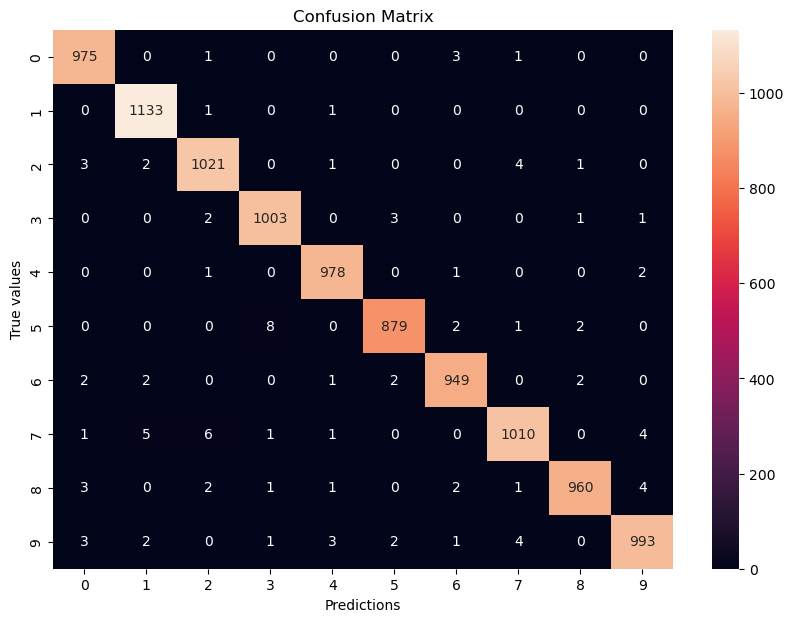

In [16]:
# See the results in a confusion matrix

y_hat = model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred)

fig = plt.figure(figsize=(10, 7))
ax= plt.subplot()
sns.heatmap(confusion_mtx, annot=True, fmt='d')
ax.set_xlabel('Predictions')
ax.set_ylabel('True values')
ax.set_title('Confusion Matrix')
fig.savefig('../output/mnist_confusion_matrix.png')